### The purpose of this notebook is to create the full automatic time series prediction by taking into account also the timing analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [74]:
## function to fomat the data
def data_format(df):
    df=df.drop(['Unnamed: 0','campaign_name', 'adset_name', 'ad_name','inline_link_click_ctr', 'inline_post_engagement',
       'instant_experience_clicks_to_open',
       'instant_experience_clicks_to_start',
       'instant_experience_outbound_clicks', 'interactive_component_tap_value',
       'objective','updated_time','website_ctr_link_click'],axis=1)
    df=df.rename(columns={'cost_per_action_type_video_view':'cpa_video_view'})
    df=df.rename(columns={'cost_per_action_type_link_click':'cpa_link_click'})
    df=df.rename(columns={'cost_per_action_type_onsite_conversion.post_save':'cpa_on_conv'})
    df=df.rename(columns={'cost_per_action_type_omni_activate_app':'cpa_all_act_app'})
    df=df.rename(columns={'cost_per_action_type_post_engagement':'cpa_post_eng'})
    df=df.rename(columns={'cost_per_action_type_page_engagement':'cpa_pg_eng'})
    df=df.rename(columns={'cost_per_action_type_omni_app_install':'cpa_all_app_install'})
    df=df.rename(columns={'cost_per_inline_link_click':'cpinl_link_click'})
    df=df.rename(columns={'cost_per_inline_post_engagement':'cpinl_post_eng'})
    df=df.rename(columns={'cost_per_outbound_click_outbound_click':'cpo_click'})
    df=df.rename(columns={'hourly_stats_aggregated_by_advertiser_time_zone':'time'})
    df=df.rename(columns={'actions_mobile_app_install':'mobile_conv'})
    df=df.rename(columns={'actions_omni_app_install':'all_conv'})
    df['CR']=round((df.mobile_conv/df.clicks) *100, 2)
    df['CTR']=round((df.clicks / df.impressions) * 100,4)
    df['CPC']= round(df.spend / df.clicks,2)
    df['costPerCon'] = round(df.spend / df.mobile_conv, 2)
    df['CPM'] = round((df.spend / df.impressions) * 1000, 2)

    df=df.dropna(subset=['time'])
    df.time=df.time.replace('00:00:00 - 00:59:59',1)
    df.time=df.time.replace('01:00:00 - 01:59:59',2)
    df.time=df.time.replace('02:00:00 - 02:59:59',3)
    df.time=df.time.replace('03:00:00 - 03:59:59',4)
    df.time=df.time.replace('04:00:00 - 04:59:59',5)
    df.time=df.time.replace('05:00:00 - 05:59:59',6)
    df.time=df.time.replace('06:00:00 - 06:59:59',7)
    df.time=df.time.replace('07:00:00 - 07:59:59',8)
    df.time=df.time.replace('08:00:00 - 08:59:59',9)
    df.time=df.time.replace('09:00:00 - 09:59:59',10)
    df.time=df.time.replace('10:00:00 - 10:59:59',11)
    df.time=df.time.replace('11:00:00 - 11:59:59',12)
    df.time=df.time.replace('12:00:00 - 12:59:59',13)
    df.time=df.time.replace('13:00:00 - 13:59:59',14)
    df.time=df.time.replace('14:00:00 - 14:59:59',15)
    df.time=df.time.replace('15:00:00 - 15:59:59',16)
    df.time=df.time.replace('16:00:00 - 16:59:59',17)
    df.time=df.time.replace('17:00:00 - 17:59:59',18)
    df.time=df.time.replace('18:00:00 - 18:59:59',19)
    df.time=df.time.replace('19:00:00 - 19:59:59',20)
    df.time=df.time.replace('20:00:00 - 20:59:59',21)
    df.time=df.time.replace('21:00:00 - 21:59:59',22)
    df.time=df.time.replace('22:00:00 - 22:59:59',23)
    df.time=df.time.replace('23:00:00 - 23:59:59',24)
    df['day']=pd.to_datetime(df['date_start']).dt.day
    df['Time']=df['time']#+24*(df['day']-1)
    df['week']=pd.to_datetime(df['date_start']).dt.week
    df.drop(df.tail(1).index,inplace = True)
    return df

In [85]:
def timing_analysis(df):
    grouped = pd.DataFrame(df.groupby(['Time','day'])['mobile_conv'].sum().reset_index())
    plot = sns.lineplot(x='Time', y='mobile_conv', data=grouped)
    return plot, grouped

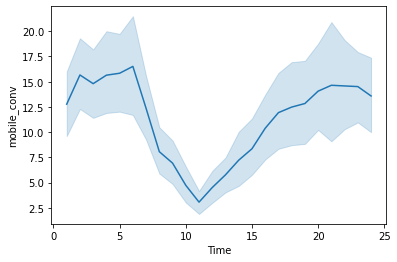

In [86]:
file='Timing Analysis/data/ad_Aug_hourly_advertiser_time.csv'
df=pd.read_csv(file)

df=data_format(df)
plot,grouped=timing_analysis(df)


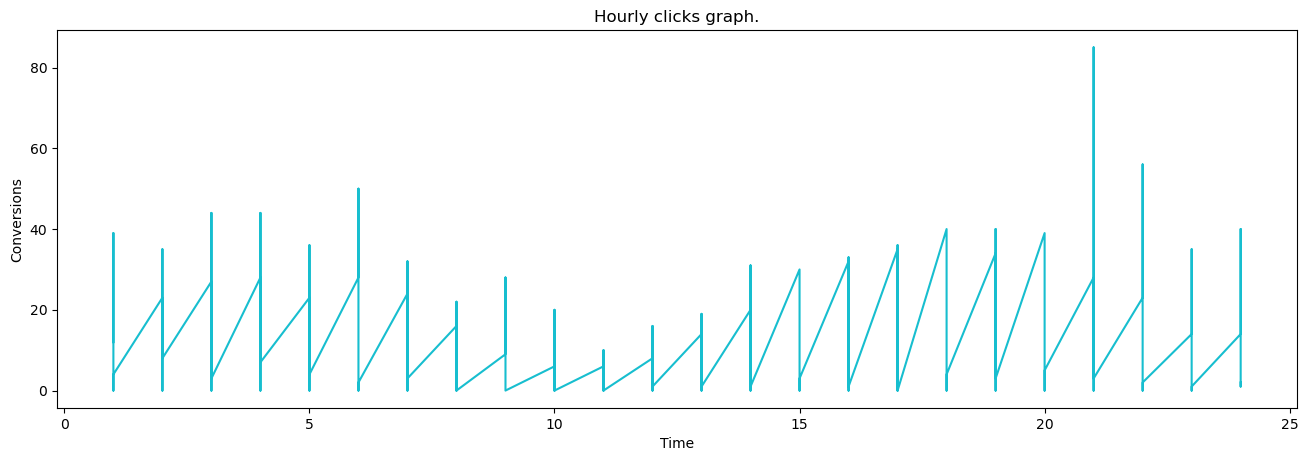

In [87]:
def plot_df(df, x, y, title="", xlabel='Time', ylabel='Conversions', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:cyan')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(grouped, x=grouped.Time, y=grouped.mobile_conv, title='Hourly clicks graph.')  

In [88]:
from statsmodels.tsa.arima_model import ARIMA


# 1,1,2 ARIMA Model
model = ARIMA(grouped.mobile_conv, order=(3,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.mobile_conv   No. Observations:                  737
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2700.484
Method:                       css-mle   S.D. of innovations              9.429
Date:                Tue, 26 Jan 2021   AIC                           5414.968
Time:                        16:02:25   BIC                           5447.186
Sample:                             1   HQIC                          5427.392
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0040      0.014     -0.286      0.775      -0.031       0.023
ar.L1.D.mobile_conv     0.5601      0.306      1.832      0.067      -0.039       1.159
ar.L2.D.mobile_c

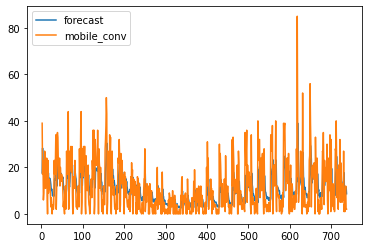

In [89]:
model_fit.plot_predict(dynamic=False)
plt.show()

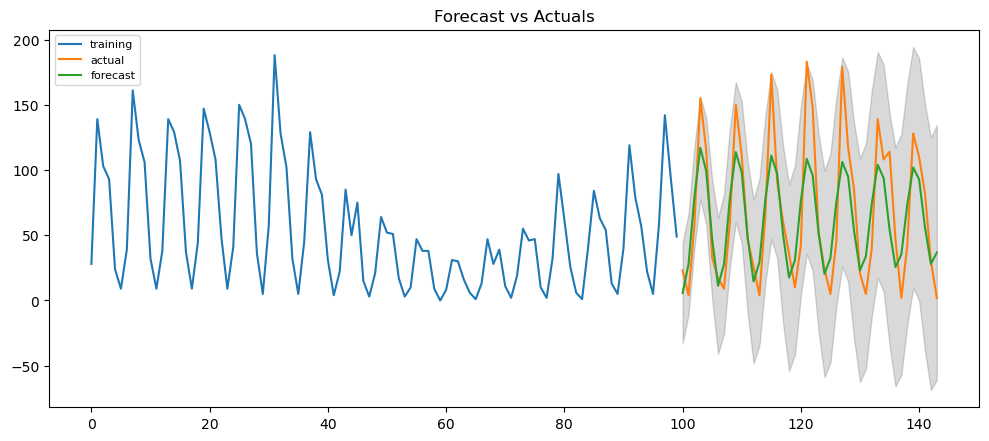

In [113]:
from statsmodels.tsa.stattools import acf
grouped=pd.DataFrame(df.groupby(['Time','week'])['mobile_conv'].sum().reset_index())
#We need to split the data in train and test samples where we use the test sample to check the forecasting
# Create Training and Test
train = grouped.mobile_conv[:100]
test = grouped.mobile_conv[100:]
# Build Model
model = ARIMA(train, order=(3, 1, 2)) 

fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(44, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [100]:
grouped

,Time,week,mobile_conv
0,1,31,28.0
1,1,32,139.0
2,1,33,103.0
3,1,34,93.0
4,1,35,24.0
...,...,...,...
139,24,32,128.0
140,24,33,110.0
141,24,34,82.0
142,24,35,30.0


In [114]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
p_values=range(0,4)
d_values=range(0,3)
q_values=range(0,3)


er=[]
orders=[]
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train,test = grouped.mobile_conv[:120],grouped.mobile_conv[120:]
            predictions=list()
            for i in range(len(test)):
                try:
                    model=ARIMA(train,order)
                    model_fit=model.fit(disp=0)
                    pred_y=model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    er.append(error)
                    orders.append(order)
                    print('ARIMA%s, MSE= %.2f'% (order,error))
                except:
                    continue


ARIMA(0, 0, 0), MSE= 3402.35
ARIMA(0, 0, 1), MSE= 4279.75
ARIMA(0, 1, 0), MSE= 7059.81
ARIMA(0, 1, 1), MSE= 7635.60
ARIMA(0, 1, 2), MSE= 4220.19
ARIMA(0, 2, 0), MSE= 11196.23
ARIMA(0, 2, 1), MSE= 7270.00
ARIMA(0, 2, 2), MSE= 7918.18
ARIMA(1, 0, 0), MSE= 4715.21
ARIMA(1, 0, 1), MSE= 4923.32
ARIMA(1, 0, 2), MSE= 6393.43
ARIMA(1, 1, 0), MSE= 7512.37
ARIMA(1, 1, 1), MSE= 5273.52
ARIMA(1, 1, 2), MSE= 4932.85
ARIMA(1, 2, 0), MSE= 11113.83
ARIMA(2, 0, 0), MSE= 4892.98
ARIMA(2, 0, 1), MSE= 4893.05
ARIMA(2, 0, 2), MSE= 3084.37
ARIMA(2, 1, 0), MSE= 6619.23
ARIMA(2, 1, 1), MSE= 3818.00
ARIMA(2, 1, 2), MSE= 3084.07
ARIMA(2, 2, 0), MSE= 11311.90
ARIMA(3, 0, 0), MSE= 4842.32
ARIMA(3, 0, 1), MSE= 4939.82
ARIMA(3, 0, 2), MSE= 3087.42
ARIMA(3, 1, 0), MSE= 4560.76
ARIMA(3, 1, 1), MSE= 3108.91
ARIMA(3, 1, 2), MSE= 3208.61
ARIMA(3, 2, 0), MSE= 16152.12
